100%|██████████| 1801/1801 [00:01<00:00, 1578.64it/s]
[[[[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  ...

  [[255]
   [255]
   [255]
   ...
   [199]
   [195]
   [195]]

  [[255]
   [255]
   [255]
   ...
   [198]
   [195]
   [195]]

  [[255]
   [255]
   [255]
   ...
   [198]
   [195]
   [195]]]]
Epoch 1/7
102/102 [==============================] - 150s 1s/step - loss: 0.6845 - accuracy: 0.5585 - val_loss: 0.6529 - val_accuracy: 0.7528
Epoch 2/7
102/102 [==============================] - 121s 1s/step - loss: 0.6107 - accuracy: 0.8023 - val_loss: 0.5976 - val_accuracy: 0.6556
Epoch 3/7
102/102 [==============================] - 142s 1s/step - loss: 0.3288 - accuracy: 0.8985 - val_loss: 0.7590 - val_accuracy: 0.7778
Epoch 4/7
102/102 [==============================] - 156s 2s/step - loss: 0.2774 - accuracy: 0.9320 - val_loss: 0.5051 - val_accuracy:

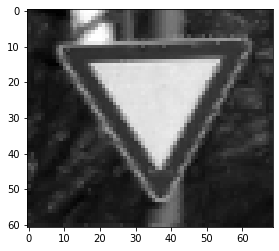

In [7]:
import cv2
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import random
#Folder with dataset
filePath =  "/Users/josiahcornelius/Desktop/Sign_Datasets/road_sign/"
#Allows us to pick what class to use
images = ["yield_sign","pass_this_side",]
 
#Pre data processing 
for category in images:
    path = os.path.join(filePath, category)
    for image_file in os.listdir(path):
        sign_array = cv2.imread(os.path.join(path,image_file), cv2.IMREAD_GRAYSCALE)
        plt.imshow(sign_array, cmap ="gray")
        break
    break
 
#Training the data
sign_size = 125
new_sign_array = cv2.resize(sign_array, (sign_size, sign_size))
training = []
def create_training_data():
    for category in images:  
        path = os.path.join(filePath,category)  
        index_value = images.index(category) 
        for image_file in tqdm(os.listdir(path)):  
            try:
                sign_array = cv2.imread(os.path.join(path,image_file) ,cv2.IMREAD_GRAYSCALE)  
                new_sign_array = cv2.resize(sign_array, (sign_size, sign_size))  
                training.append([new_sign_array, index_value])  
            except Exception as e:  
                pass          
create_training_data()
random.shuffle(training)
 
#Input for our CNN model
x_training = []
y_features = []
 
#Turns our data off 
for features,label in training:
    x_training.append(features)
    y_features.append(label)
print(x_training[0].reshape(-1, sign_size, sign_size, 1))
x_training = np.array(x_training).reshape(-1, sign_size, sign_size, 1)
x_training=np.array(x_training/255.0)
y_features=np.array(y_features)
 
#CNN model
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(125,125,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())  
model.add(Dense(64))
model.add(Activation('relu'))2
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])
#Running our modoel and analyzing 
model.fit(x_training, y_features, batch_size=32, epochs=7, validation_split=0.1)


In [ ]:
from tensorflow.keras.callbacks import TensorBoard